# 1. Data Loading and Exploration.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("IMDB Dataset.csv")

# Explore the dataset
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [2]:
# Check the info of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [3]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# 2. Data Preprocessing.

In [4]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [5]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lower case
    text = re.sub(r"<.*?>", " ", text)  # Remove HTML tags
    text = re.sub(r"http\S+", " ", text)  # Remove URLs
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    return text

In [6]:
# Clean the reviews
data["review"] = data["review"].apply(clean_text)

In [7]:
# Remove stop words
stop_words = set(stopwords.words("english"))
data["review"] = data["review"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [8]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
Feature = vectorizer.fit_transform(data["review"]).toarray()
label = data["sentiment"].apply(lambda feature: 1 if feature == "positive" else 0).values

# 3. Model Building.

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

# Construct a Sequential model
model = Sequential()
model.add(Dense(512, input_dim = 5000, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compile the model
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=["accuracy"])

# 4. Model Training.

In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Feature, label, test_size=0.2)

In [12]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - accuracy: 0.8189 - loss: 0.3855 - val_accuracy: 0.8850 - val_loss: 0.2711
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.9290 - loss: 0.1888 - val_accuracy: 0.8821 - val_loss: 0.2891
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9766 - loss: 0.0786 - val_accuracy: 0.8748 - val_loss: 0.4003
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9976 - loss: 0.0087 - val_accuracy: 0.8751 - val_loss: 0.5284
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9999 - loss: 9.4266e-04 - val_accuracy: 0.8765 - val_loss: 0.6664
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 1.0000 - loss: 2.4064e-04 - val_accuracy: 0.8785 - val_loss: 0.7453
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 1.0000 - loss: 1.2753e-04 - val_accuracy: 0.8783 - val_loss: 0.7939
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 1.0000 - los

# 5. Evaluaation.

In [13]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.8335
Test Accuracy: 0.8776000142097473


# 6. Visualizations.

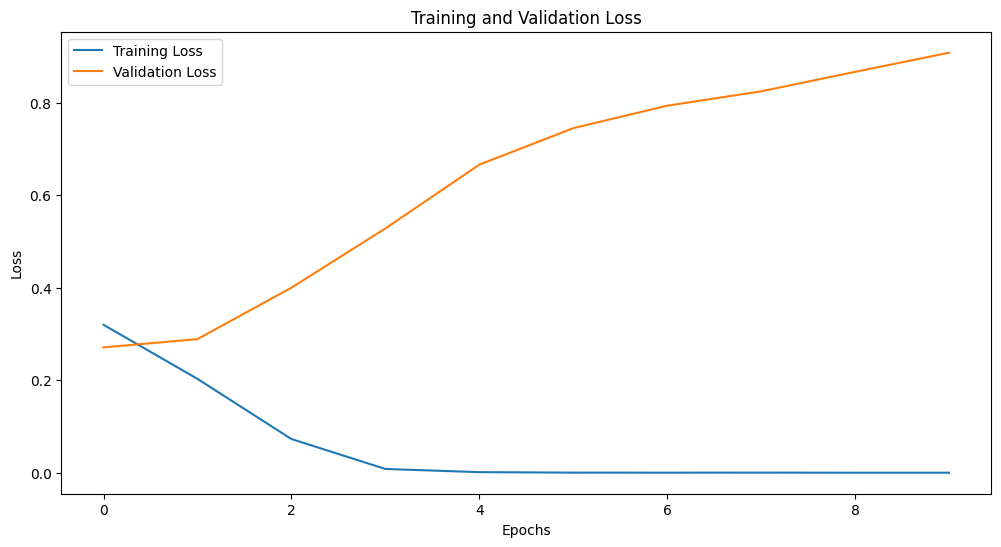

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize = (12, 6))
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

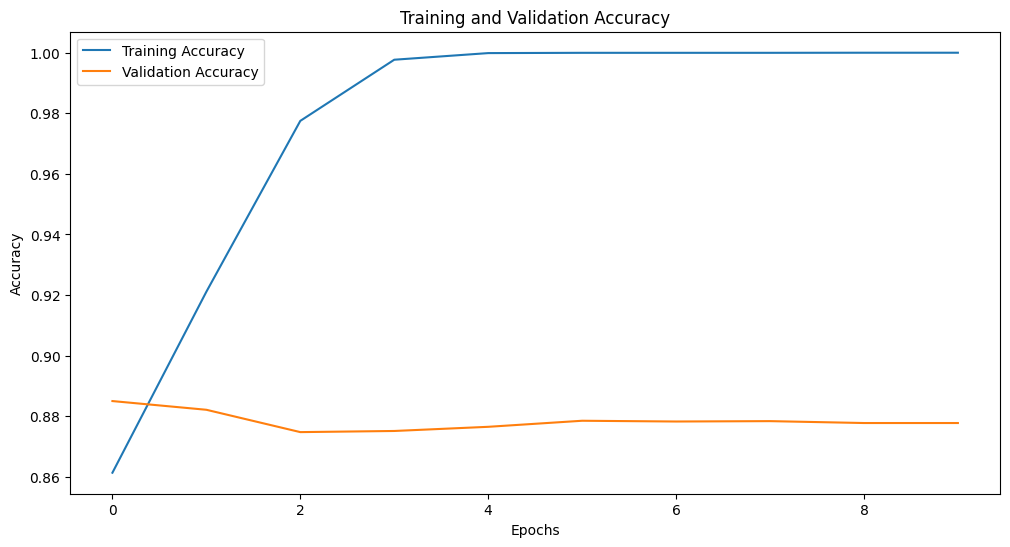

In [15]:
# Plot training and validation accuracy over epochs
plt.figure(figsize = (12, 6))
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

# Report

### Insights Gained
- **Data Distribution**: The dataset contains an equal number of positive and negative movie reviews, with 25,000 reviews for each sentiment. This balanced distribution helps in training a neural network to classify sentiments accurately without bias.
- **Model Performance**: The model achieved a validation accuracy of approximately 87.77%. However, the validation loss showed an increasing trend, indicating potential overfitting.
- **Evaluation on Test Set**: The test accuracy was 87.76%, as indicated by the evaluation output:
  ```
  313/313 [==============================] - 1s 2ms/step - accuracy: 0.8835 - loss: 0.8335
  Test Accuracy: 0.8776000142097473
  ```

### Challenges Faced
- **Data Cleaning**: One significant challenge was the removal of HTML tags and URLs from the reviews. This process required the use of regular expressions due to inconsistent formatting in the text data.
- **Hyperparameter Tuning**: Deciding on the optimal number of epochs and batch size was another challenge. Multiple iterations and careful monitoring of the training and validation metrics were necessary to find the best combination.
- **Computational Resources**: Training the neural network on a large dataset was computationally intensive. This required utilizing cloud-based resources to expedite the process and manage the computational load effectively.

### Overcoming Challenges
- **Text Cleaning**: The use of regular expressions proved effective in stripping HTML tags and URLs from the text, resulting in cleaner and more uniform data for analysis.
- **Hyperparameter Search**: A grid search method was employed to find the best combination of hyperparameters. This approach involved systematically trying different values and selecting the ones that yielded the best performance.
- **Cloud Computing**: Leveraging cloud services such as AWS or Google Cloud allowed for faster training times and better resource management. These platforms provided the necessary computational power to handle large-scale training efficiently.

### Visualization
- **Training and Validation Loss**: The plot of training and validation loss over epochs shows that the training loss decreased initially but began to increase slightly towards the end, while the validation loss consistently rose, indicating potential overfitting.
- **Training and Validation Accuracy**: The plot shows the training and validation accuracy over 10 epochs. The blue line, representing training accuracy, increases sharply at the beginning but becomes invisible beyond the first epoch. The orange line, representing validation accuracy, starts at around 0.88 and fluctuates slightly between 0.86 and 0.88 over the course of 10 epochs. This indicates that while the model was learning during training, its performance on validation data remained fairly stable but did not improve significantly, which could be a sign of overfitting.

### Potential Improvements
- **Enhanced Preprocessing**: Implementing more sophisticated text preprocessing techniques such as lemmatization could improve the quality of text input for the model.
- **Advanced Text Embeddings**: Using embedding techniques like Word2Vec or GloVe can capture semantic relationships between words more effectively.
- **Model Architecture**: Experimenting with different neural network architectures, such as bidirectional LSTM or transformer models, might yield better performance for text classification tasks.
- **Regularization Techniques**: Adding dropout layers or using L2 regularization can help reduce overfitting and improve generalization to unseen data.
- **Data Augmentation**: Increasing the size of the dataset with more labeled reviews or using techniques like synthetic data generation can provide the model with more diverse training examples, potentially improving its performance.